<a href="https://colab.research.google.com/github/loaiwalid07/main/blob/main/Classification_of_Disasters_from_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classification of Disasters from tweets**

In [ ]:
import random 
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords,gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit,KFold,cross_val_score,train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn import svm
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix,accuracy_score,f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import seaborn as sns
import wordcloud
#_____________________

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
print("Done")   

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Done


**Clean and Preprocessing on Data**

* Removing punctuation
* Tokenization
* Remove stopwords
* Lemmatize/ stem








In [ ]:
df=pd.read_csv("train.csv")
df["text"]= df["text"].str.replace("[^a-zA-Z0-9]", " ")
df["keyword"]= df["keyword"].str.replace("[^a-zA-Z0-9]", " ")
data=pd.DataFrame( {'Text':df["text"].to_list(), 'Target':df["target"].to_list()})
data

,Text,Target
0,Our Deeds are the Reason of this earthquake M...,1
1,Forest fire near La Ronge Sask Canada,1
2,All residents asked to shelter in place are ...,1
3,13 000 people receive wildfires evacuation or...,1
4,Just got sent this photo from Ruby Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,aria ahrary TheTawniest The out of control w...,1
7610,M1 94 01 04 UTC 5km S of Volcano Hawaii htt...,1
7611,Police investigating after an e bike collided ...,1


In [ ]:
# removing short words/ punctuation
data["Text"]= data["Text"].apply(lambda x: " ".join ([w for w in x.split() if len (w)>3]))

In [ ]:
# tokenize the data

def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens
data['Text']= data['Text'].apply (lambda x: tokenize(x.lower()))

In [ ]:
# remove stopwords
stop_words=set(stopwords.words("english"))
def remove_stopword(text):
    text_nostopword= [char for char in text if char not in stop_words]
    return text_nostopword

data['Text']= data['Text'].apply(lambda x: remove_stopword(x))

In [ ]:
# stemming 
ps = nltk.stem.porter.PorterStemmer()
def stem(tweet_no_stopword):
   text = [ps.stem ( word) for word in tweet_no_stopword]
   return text

data["Text"]= data["Text"].apply(lambda x: stem(x))

In [ ]:
data

,Text,Target
0,"[deed, reason, earthquak, allah, forgiv]",1
1,"[forest, fire, near, rong, sask, canada]",1
2,"[resid, ask, shelter, place, notifi, offic, ev...",1
3,"[peopl, receiv, wildfir, evacu, order, califor...",1
4,"[sent, photo, rubi, alaska, smoke, wildfir, po...",1
...,...,...
7608,"[giant, crane, hold, bridg, collaps, nearbi, h...",1
7609,"[aria, ahrari, thetawniest, control, wild, fir...",1
7610,"[volcano, hawaii, http, zdtoyd8ebj]",1
7611,"[polic, investig, bike, collid, littl, portug,...",1


In [ ]:
X, y = data["Text"],data["Target"]
X.shape, y.shape

x=[]
for i in X:
  x.append(str(i))

X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

**Features Engineering**
* TF-IDF
* BOW
* LDA

In [ ]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape
vectorizer = TfidfTransformer()
x_tf = vectorizer.fit_transform(X_train_counts)

**MultinomialNB**

Accuracy for MultinomialNB :->  0.775797373358349

F1 for MultinomialNB :->  0.7055925104705593
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      3052
           1       0.80      0.63      0.71      2278

    accuracy                           0.78      5330
   macro avg       0.78      0.76      0.76      5330
weighted avg       0.78      0.78      0.77      5330



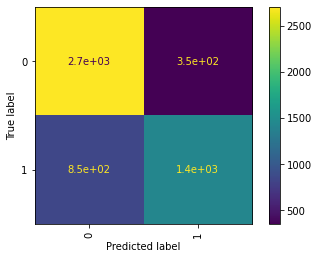


[The Accuracy by using cross validation]

Accuracy at Iteration: array([0]) -> 0.7900262467191601
Accuracy at Iteration: array([1]) -> 0.8097112860892388
Accuracy at Iteration: array([2]) -> 0.8228346456692913
Accuracy at Iteration: array([3]) -> 0.8160315374507228
Accuracy at Iteration: array([4]) -> 0.7818659658344284
Accuracy at Iteration: array([5]) -> 0.8055190538764783
Accuracy at Iteration: array([6]) -> 0.8081471747700394
Accuracy at Iteration: array([7]) -> 0.7936925098554534
Accuracy at Iteration: array([8]) -> 0.7779237844940867
Accuracy at Iteration: array([9]) -> 0.7884362680683311
Total accuracy: 0.80 (+/- 0.03)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_clf_mul = Pipeline([
   # ('vect', CountVectorizer()),
   ('tfidf', TfidfVectorizer()),
  #  ("tf",TfidfTransformer()),
    
    #('LDA',LatentDirichletAllocation(n_components=5,random_state=1234)),    
    ('clf', MultinomialNB()),
])
text_clf_mul.fit(X_train,y_train)
docs_test =x_test
predicted = text_clf_mul.predict(docs_test)
print("Accuracy for MultinomialNB :-> ",np.mean(predicted == y_test))
print("\nF1 for MultinomialNB :-> ",f1_score(y_test, predicted, average='binary'))
print(metrics.classification_report(y_test, predicted ))
plot_confusion_matrix(text_clf_mul, x_test, y_test,xticks_rotation="vertical")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_mul = cross_val_score(text_clf_mul, x, y, cv=kf)
for i in scores_mul:
  print("Accuracy at Iteration: %r ->"%(np.where(scores_mul == i)),i)
print("Total accuracy: %0.2f (+/- %0.2f)" % (scores_mul.mean(), scores_mul.std() * 2))

**KNN**

In [ ]:
text_clf_knn = Pipeline([
  ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=2),)
])
text_clf_knn.fit(X_train,y_train)
test_knn =X_test
predicted_knn = text_clf_knn.predict(test_knn)
print("Accuracy for KNN : -> ",np.mean(predicted_knn == y_test))
print(metrics.classification_report(y_test, predicted_knn))
plot_confusion_matrix(text_clf_knn, X_test, y_test,xticks_rotation="vertical")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_knn = cross_val_score(text_clf_knn, x, y, cv=kf)
for i in scores_knn:
  print("Accuracy at Iteration: %r ->"%(np.where(scores_knn == i)),i)
print("Total accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


ValueError: ignored

#SVM

Accuracy for SVM :->  0.7911741528762806
              precision    recall  f1-score   support

           0       0.77      0.92      0.83      2185
           1       0.85      0.62      0.72      1622

    accuracy                           0.79      3807
   macro avg       0.81      0.77      0.78      3807
weighted avg       0.80      0.79      0.78      3807



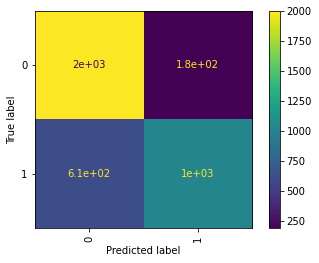

In [ ]:
text_clf_svm = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('tfdf', TfidfTransformer()),
    #('LDA',LatentDirichletAllocation(n_components=5,random_state=1234)),
    ('clf', svm.SVC(),)
])
text_clf_svm.fit(X_train,y_train)
test_svm =x_test
predicted_svm = text_clf_svm.predict(test_svm)
print("Accuracy for SVM :-> ",np.mean(predicted_svm == y_test))
print(metrics.classification_report(y_test, predicted_svm))
plot_confusion_matrix(text_clf_svm, x_test, y_test,xticks_rotation="vertical")
plt.show()

# print("\n[The Accuracy by using cross validation]\n")
# cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
# kf = KFold(n_splits=10,shuffle=True,random_state=0)
# scores_svm = cross_val_score(text_clf_svm, x, y, cv=kf)
# for i in scores_svm:
#   print("Accuracy at Iteration: %r ->"%(np.where(scores_svm == i)),i)
# print("Total accuracy: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

**tuning Hyperpramter**

In [ ]:
moddel = text_clf_DT["clf"]
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model 
grid_search = GridSearchCV(estimator=moddel, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy") 
grid_search.fit(x_tf, y_train)
print(grid_search.best_params_)
print("Best Accu:->",grid_search.best_score_)
moddel_best = grid_search.best_estimator_ 
moddel_best
# grid_predictions = grid_search.predict(x_test)
# print(classification_report(y_test, grid_predictions))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   15.5s


{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}
Best Accu:-> 0.6909370923812034


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   15.7s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#Decision Tree

Accuracy for DecisionTree :->  0.7132224168126094
              precision    recall  f1-score   support

           0       0.69      0.94      0.79      1338
           1       0.81      0.40      0.54       946

    accuracy                           0.71      2284
   macro avg       0.75      0.67      0.66      2284
weighted avg       0.74      0.71      0.69      2284



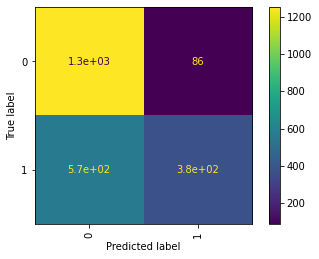


[The Accuracy by using cross validation]

Accuracy at Iteration: array([0]) -> 0.7007874015748031
Accuracy at Iteration: array([1]) -> 0.7191601049868767
Accuracy at Iteration: array([2]) -> 0.7257217847769029
Accuracy at Iteration: array([3]) -> 0.6964520367936925
Accuracy at Iteration: array([4]) -> 0.668856767411301
Accuracy at Iteration: array([5]) -> 0.7174770039421814
Accuracy at Iteration: array([6]) -> 0.7201051248357424
Accuracy at Iteration: array([7]) -> 0.7109067017082786
Accuracy at Iteration: array([8]) -> 0.7056504599211564
Accuracy at Iteration: array([9]) -> 0.7148488830486203
Total accuracy: 0.71 (+/- 0.03)


In [ ]:
text_clf_DT = Pipeline([
    ('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_leaf=5,random_state=1234),)
])

text_clf_DT.fit(X_train,y_train)
test_DT =x_test
predicted_DT = text_clf_DT.predict(test_DT)
print("Accuracy for DecisionTree :-> ",np.mean(predicted_DT == y_test))
print(metrics.classification_report(y_test, predicted_DT))
plot_confusion_matrix(text_clf_DT, x_test, y_test,xticks_rotation="vertical")
plt.show()

print("\n[The Accuracy by using cross validation]\n")
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
kf = KFold(n_splits=10,shuffle=True,random_state=0)
scores_DT = cross_val_score(text_clf_DT, x, y, cv=kf)
for i in scores_DT:
  print("Accuracy at Iteration: %r ->"%(np.where(scores_DT == i)),i)
print("Total accuracy: %0.2f (+/- %0.2f)" % (scores_DT.mean(), scores_DT.std() * 2))

**RandomForestClassifier**

In [ ]:
text_clf_rf = Pipeline([
    ('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ("classifier_rf",RandomForestClassifier(oob_score=True))])
text_clf_rf.fit(X_train, y_train) 
print("Accu ->:",text_clf_rf["classifier_rf"].oob_score_)

Accu ->: 0.7266754270696452


**MLP**

Accuracy for DecisionTree :->  0.7407129455909943
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      3052
           1       0.69      0.70      0.70      2278

    accuracy                           0.74      5330
   macro avg       0.74      0.74      0.74      5330
weighted avg       0.74      0.74      0.74      5330



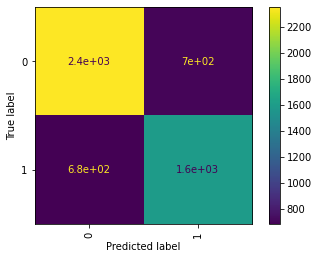

In [ ]:
text_clf_mlp = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('MLP', MLPClassifier())])
text_clf_mlp.fit(X_train, y_train)
test_mlp =x_test
predicted_mlp = text_clf_mlp.predict(test_mlp)
print("Accuracy for DecisionTree :-> ",np.mean(predicted_mlp == y_test))
print(metrics.classification_report(y_test, predicted_mlp))
plot_confusion_matrix(text_clf_mlp, x_test, y_test,xticks_rotation="vertical")

**xgbost**

In [ ]:
text_clf_xgb = Pipeline([
   # ('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
   # ('tfidf', TfidfTransformer()),
    ('model_xgb' , XGBClassifier(max_depth=10))])
text_clf_xgb.fit(X_train, y_train).score(x_test,y_test)

0.7371482176360226

**AdBoost**

In [ ]:
text_clf_ad = Pipeline([
    ('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('ad_clf'  ,AdaBoostClassifier(n_estimators=100, random_state=1234,learning_rate=0.3))])
text_clf_ad.fit(X_train, y_train).score(x_test,y_test)

0.6938120256859311

**Bagging**

In [ ]:
text_clf_bag = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('bag' , BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=1234))])
text_clf_bag.fit(X_train, y_train).score(x_test,y_test)

0.7731707317073171

**Stacking**

In [ ]:
models = [#('lr',LogisticRegression()),
          ('svm', make_pipeline(StandardScaler(),svm.SVC())),
     #     ('nb',GaussianNB()),
     ("dt",DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(n_estimators=25, max_depth=10,min_samples_leaf=5, random_state=1234)),
    #('svr', make_pipeline(StandardScaler(),svm.LinearSVC(random_state=1234)))
    ]

text_clf_stack = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('stacking' , StackingClassifier(estimators=models,final_estimator=svm.SVC()))])
text_clf_stack.fit(X_train, y_train).score(x_test, y_test)


**Test on unseen dataset**

In [ ]:
df_test=pd.read_csv("test.csv")

df_test["text"]= df_test["text"].str.replace("[^a-zA-Z0-9]", " ")
data_test=pd.DataFrame( {'Text':df_test["text"].to_list()})

# removing short words/ punctuation
data_test["Text"]= data_test["Text"].apply(lambda x: " ".join ([w for w in x.split() if len (w)>3]))
# tokenize the data test
data_test['Text']= data_test['Text'].apply (lambda x: tokenize(x.lower()))
# remove stopwords
data_test['Text']= data_test['Text'].apply(lambda x: remove_stopword(x))
# stemming 
data_test["Text"]= data_test["Text"].apply(lambda x: stem(x))

X_test=[]
for i in data_test["Text"]:
  X_test.append(str(i))

In [ ]:
text_clf_svm = Pipeline([
    ('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('clf', svm.SVC(),)
])
text_clf_svm.fit(x,y)
test_svm =X_test
predicted_svm = text_clf_svm.predict(test_svm)


In [ ]:
pred_df=pd.DataFrame({'id':df_test["id"],'target':text_clf_svm.predict(X_test)})
pred_df.to_csv("result.csv",index=False)